In [445]:
# Computational Physics Project 4 - Molecular Orbital Theory
# Ben Zager, Zach Faber-Manning, Michael Rosen

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.linalg import eigh,solve,norm

np.set_printoptions(precision=3)


In [446]:
# Define molecules
# {name of molecule, number of double bonds}

buta = {"name":"butadiene","db":2} 
benz = {"name":"benzene","db":3} 
tolu = {"name":"toluene","db":3} # benzene with methyl group
naph = {"name":"naphthalene","db":5} # two connected benzene rings
buck = {"name":"buckyball","db":30} # Buckminsterfullerene
ethe = {"name":"ethene","db":1} # ethene (for delocalization energy calculations)

In [457]:
# Set molecule to analyze

mol = buck # select molecule

name = mol["name"]
adj = np.loadtxt("data/"+name+".txt")

N = adj.shape[0] # number of carbons
Ne = N # number of pi electrons
db = mol["db"] # number of double bonds (2 for butadiene, 3 for benzene/toluene, 5 for naphthalene, 30 for buckyball)

In [458]:
# Compute eigenvalues and eigenvectors
# analytical solutions, molecule with n atoms
# linear molecule: E_k = 2cos(k*pi/(n+1))
# cyclic molecule: E_k = 2cos(2k*pi/n)

# gram schmidt method to orthonormalize eigenvectors
# M is a matrix with each column an eigenvector, V is new matrix
# adapted from andreask.cs.illinois.edu/cs357-s15/public/demos/05-orthgonality/Gram-Schmidt%20and%20Modified%20Gram-Schmidt.py
def gramSchmidt(M):
    n = M.shape[0]
    V = np.zeros([n,n])
    V[:,0] = M[:,0] / norm(M[:,0])

    for i in range(n):
        q = M[:,i]
        for j in range(i):
            q = q - np.dot(q,V[:,j])*V[:,j]
    
        V[:,i] = q/norm(q)
        
    return V
    
# Finds eigenvalues and eigenvectors
# args: adjacency matrix
# rets: tuple, (eigenvalues,eigenvectors) 
def getEigs(adj):
    eigs = eigh(adj)
    evals = np.flip(np.around(eigs[0],4),0) # eigenvalues
    evecs = np.flip(np.around(eigs[1],4),1) # eigenvectors
    
    evecs = gramSchmidt(evecs) # orthogonalize eigenvectors
    
    return (evals,evecs)

evals,evecs = getEigs(adj)

print("Eigenvalues\n")
for i in range(N):
    print(str(i+1)+" : a + "+str(np.around(evals[i],3))+"b  " + str(np.around(evecs[:,i],3)))


Eigenvalues

1 : a + 3.0b  [-0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129
 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129
 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129
 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129
 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129
 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129]
2 : a + 2.757b  [ 0.     0.064  0.03  -0.055 -0.074  0.01  -0.056 -0.024  0.062  0.083
  0.147  0.156  0.2    0.218  0.186  0.074  0.147  0.145  0.071  0.027
 -0.109 -0.07  -0.112 -0.176 -0.174 -0.149 -0.196 -0.216 -0.182 -0.14   0.14
  0.182  0.216  0.196  0.149  0.174  0.176  0.112  0.07   0.109 -0.027
 -0.071 -0.145 -0.147 -0.074 -0.186 -0.218 -0.2   -0.156 -0.147 -0.083
 -0.062  0.024  0.056 -0.01   0.074  0.055 -0.03  -0.064  0.   ]
3 : a + 2.757b  [ 0.223  0.209  0.185  0.185  0.209  0.198  0.161  0.102  0.102  0.162
  0.168  0.145  0

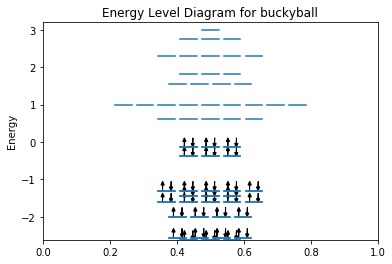

Electron energies: [-2.618 -2.618 -2.618 -2.618 -2.618 -2.618 -2.562 -2.562 -2.562 -2.562
 -2.562 -2.562 -2.562 -2.562 -2.    -2.    -2.    -2.    -2.    -2.    -2.
 -2.    -1.618 -1.618 -1.618 -1.618 -1.618 -1.618 -1.618 -1.618 -1.618
 -1.618 -1.438 -1.438 -1.438 -1.438 -1.438 -1.438 -1.303 -1.303 -1.303
 -1.303 -1.303 -1.303 -1.303 -1.303 -1.303 -1.303 -0.382 -0.382 -0.382
 -0.382 -0.382 -0.382 -0.139 -0.139 -0.139 -0.139 -0.139 -0.139]
Occupation numbers: [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]
Total ground state energy: -93.1622b


In [459]:
# Very ugly function, try to improve

# Plots energy level diagram and determines electron energies
# args: ordered list of eigenvalues, number of electrons
# rets: list of energies for the Ne electrons
def energyLevel(evals,Ne,name,show=False,save=False):
    
    # parameters for drawing diagram
    mid = 0.5 # midpoint
    width = 0.05 # width of each line
    space = 0.015 # spacing between lines
    arrlen = 0.15 # arrow length
    hw = 0.01 # width of head of arrow
    hl = 0.1 # length of head of arrow

    # get unique list of energies
    # returns tuple of two arrays, ([energies],[multiplicity])
    uniq = np.unique(np.around(evals,4),return_counts=True)

    energies = np.zeros(Ne) # stores energies of each electron
    occu = np.zeros(evals.size) # occupation number
    filled = 0 # keep track of how many electrons are left
    orb = 1 # keep track of current orbital
    
    for i in range(uniq[0].size): # go through each unique energy level
        E = uniq[0][i]
        m = uniq[1][i] # multiplicity
        start = mid - 0.5*(m-1)*(width+space) # where first line is drawn (left edge)
        
        turn = 1 # 1st or 2nd sweep through level
        j = 0 # keep track of degenerate energy levels

        while j < m:
            xL = start + j*(width+space) - 0.5*width # set bounds for drawing line
            xR = xL + width
            plt.axhline(E,xmin=xL,xmax=xR) # draw horizontal line
            if filled < Ne:
                energies[filled] = E
                if turn == 1:
                    elec = np.mean([xL,xR]) - 0.25*width
                    plt.arrow(elec,E,0,arrlen,head_width=hw,head_length=hl,fc='k',ec='k')
                    filled += 1
                    occu[orb-1] = 1
                    if j == m-1:
                        turn = 2
                        j = 0
                        orb -= (m-1)
                        continue     
                elif turn == 2:
                    elec = np.mean([xL,xR]) + 0.25*width
                    plt.arrow(elec,E+arrlen+hl,0,-arrlen,head_width=hw,head_length=hl,fc='k',ec='k')
                    filled += 1
                    occu[orb-1] = 2
                orb += 1
            j += 1
    
    plt.ylabel("Energy")
    plt.xlim([0,1])
    plt.ylim([np.min(evals),np.max(evals)+2*hl])
    plt.title("Energy Level Diagram for "+name)
    if save:
        plt.savefig("figures/energyLevels_"+name+".png")
    if show:
        plt.show()
    else:
        plt.close()
        
    return energies,occu


energies,occu = energyLevel(evals,Ne,name,show=True,save=True)
ETot = np.sum(energies)
print("Electron energies:",energies)
print("Occupation numbers:",occu)
print("Total ground state energy:",str(ETot)+"b")


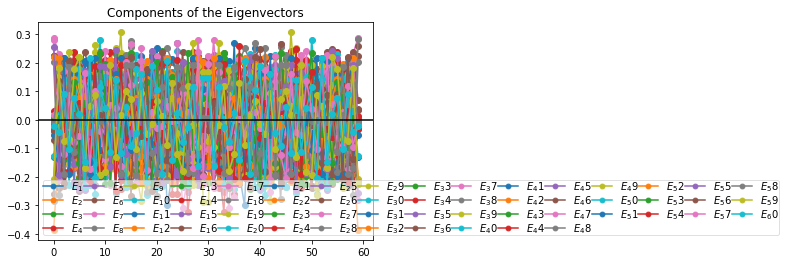

In [460]:
# Plot eigenvectors

for i in range(N):
    plt.plot(evecs[:,i],'-o',label=r"$E_"+str(i+1)+"$")

plt.axhline(0,color='k')
plt.title("Components of the Eigenvectors")
plt.legend(ncol=1 + int(N/4),columnspacing=0,borderpad=0,framealpha=0.6,labelspacing=0,markerscale=0.8)
plt.show()

In [462]:
# Delocalization energy
# energy difference from ground state and isolated double bonds (compare to ethylene)
# Butadiene - 0.472
# Benzene - 2.0
# Toluene - 2.72
# Naphthalene - 3.68
# Buckyball - 33.16

# determine delocalization energy, given total ground state energy and number of double bonds
def calcDeloc(ETot,numDB,name):
    NeEthe = 2 # pi electrons in ethene
    adjEthe = np.loadtxt("data/ethene.txt")
    evalsEthe = getEigs(adjEthe)[0]
    EEthe = energyLevel(evalsEthe,NeEthe,name)[0]
    ETotEthe = np.sum(EEthe)
    deloc = numDB*ETotEthe - ETot

    return deloc

deloc = calcDeloc(ETot,db,name)

print("Delocalization energy: "+str(deloc))

Delocalization energy: 33.1622


In [463]:
# Charge density estimation 
# for single electron in orbital I, |c_Ir|^2 is probability of electron being on atom r
# Butadiene - all 1
# Benzene - 
# Toluene - all 1
# Naphthalene - all 1
# Buckyball - all 1 

def chargeDensity(evecs,energies,occu):
    q = np.zeros(N)
        
    for r in range(N):
        c = evecs[r,:] # get the rth component of all eigenvectors
        cSq = np.square(c)
        q[r] = np.dot(cSq,occu)
    
    return q

q = chargeDensity(evecs,energies,occu)

print(q)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.]


In [464]:
# Bond order calculation
# Butadiene - 0.894 0.447 0.894
# Benzene - 0.667 0.667 0.667 0.667 0.667 0.667
# Toluene - 0.635 0.523 0.705 0.635 0.635 0.705
# Naphthalene - 0.725 0.555 0.603 0.725 0.555 0.555 0.518 0.725 0.603 0.725 0.555
# Buckyball - 

# Verification with known values:
# Butadiene - www.faculty.umassd.edu/michele.mandrioli/424book/fchm8.8.html
# Benzene - ocw.mit.edu/courses/chemistry/5-61-physical-chemistry-fall-2007/lecture-notes/lecture31.pdf
# Toluene - 
# Naphthalene - 
# Buckyball - 

def bondOrder(adj,evecs,energies,occu):
    adjUp = np.triu(adj) # remove redundant elements
    r,s = np.nonzero(adjUp) # get indices of nonzero elements
    p = np.zeros(r.size)
    
    for i in range(r.size):
        cr = evecs[r[i],:]
        cs = evecs[s[i],:]
                
        cPr = np.multiply(cr,cs)
                
        p[i] = np.dot(cPr,occu)
    
    return p
    
p = bondOrder(adj,evecs,energies,occu)

print(p)

[ 0.476  0.476  0.601  0.476  0.601  0.476  0.601  0.476  0.601  0.601
  0.476  0.476  0.476  0.601  0.476  0.601  0.476  0.601  0.601  0.476
  0.476  0.476  0.476  0.601  0.476  0.601  0.601  0.476  0.476  0.476
  0.476  0.601  0.476  0.601  0.601  0.476  0.476  0.476  0.476  0.601
  0.476  0.601  0.601  0.476  0.476  0.476  0.476  0.601  0.476  0.601
  0.476  0.476  0.601  0.476  0.476  0.476  0.601  0.601  0.476  0.476
  0.476  0.476  0.476  0.601  0.601  0.476  0.476  0.476  0.476  0.476
  0.601  0.601  0.476  0.476  0.476  0.476  0.476  0.601  0.601  0.476
  0.476  0.476  0.476  0.476  0.601  0.476  0.476  0.476  0.476  0.476]


In [428]:
# Part B
# Construct adjacency matrix for graphene

# maps an (i,j) index from the square grid to the number of the atom at that location
def indexFind(i,j,rows,cols):
    i = i%cols # wrap around for periodic boundaries
    j = j%rows
    return j*cols + i

# adds connection to adjacency matrix given 2 connected carbon atoms
def connect(n1,n2,adjMat):
    adjMat[n1,n2] = 1
    return

# constructs the adjacency matrix for the "zigzag" configuration of graphene
def constructZigzag(rows,cols):
    adjMat = np.zeros([rows*cols,rows*cols])
    
    for i in range(cols):
        for j in range(rows):
            cur = indexFind(i,j,rows,cols)
            
            # connect current atom to horizontal neighbors
            connect(cur,indexFind(i+1,j,rows,cols),adjMat) 
            connect(cur,indexFind(i-1,j,rows,cols),adjMat)
            
            # connect to vertical neighbor if not on edge
            # determine if connection is up or down
            if i%2 == j%2 and j != rows-1:
                connect(cur,indexFind(i,j+1,rows,cols),adjMat)
            elif i%2 != j%2 and j != 0:
                connect(cur,indexFind(i,j-1,rows,cols),adjMat)    
    return adjMat

# constructs the adjacency matrix for the "armchair" configuration of graphene
def constructArmchair(rows,cols):
    adjMat = np.zeros([rows*cols,rows*cols])
    
    for i in range(cols):
        for j in range(rows):
            cur = indexFind(i,j,rows,cols)
            
            # connect current atom to horizontal neighbors, accounting for edges
            if i != cols-1:
                connect(cur,indexFind(i+1,j,rows,cols),adjMat)
            if i != 0:
                connect(cur,indexFind(i-1,j,rows,cols),adjMat)
            
            # connect to correct vertical neighbor
            if i%2 == j%2:
                connect(cur,indexFind(i,j+1,rows,cols),adjMat)
            else:
                connect(cur,indexFind(i,j-1,rows,cols),adjMat)        
    return adjMat

# construct adjacency matrix for graphene given the number of rows and columns in the "stretched" lattice
def constructAdj(rows,cols):
    if rows < cols:
        adjMat = constructZigzag(rows,cols)
    else:
        adjMat = constructArmchair(rows,cols)
    return adjMat

Number of Carbon atoms: 184


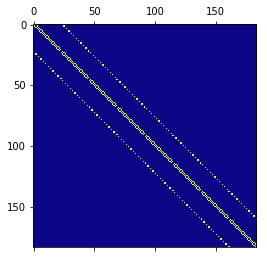

In [538]:
# Set parameters for constructing graphene adjacency matrix
# for zigzag configuration, use arm > zig
# for armchair configuration, use zig > arm

zig = 7  # layers of hexagons connected by flat edge
arm = 11  # layers of hexagons connected in "armchair" pattern
name = "Graphene"+str(zig)+"x"+str(arm)

# Consider "stretched" hex lattice in brick wall pattern
# Each brick is 2 bonds long and 1 bond wide
rows = zig+1  # number of rows in "stretched" square lattice
cols = arm*2 + 1  # number of columns in "stretched" square lattice

Nc = rows*cols # total number of carbon atoms
Ne = Nc # total number of pi electrons

graph = constructAdj(rows,cols)
print("Number of Carbon atoms: "+str(Nc))
plt.matshow(graph,cmap=plt.cm.plasma)
plt.show()

In [539]:
# Calculate eigenvalues/eigenvectors and energy levels of graphene

evalsGraph,evecsGraph = getEigs(graph)
energies,occu = energyLevel(evalsGraph,Ne,name,show=False)

In [540]:
# Functions for drawing graphene lattice

# determines sign of vertical increment
# if i%2 == j%2 -> +dy
# if i%2 != j%2 -> -dy
def deltaY(i,j,dy): 
    if i%2 == j%2:
        return dy
    else:
        return -dy

# generate list of coordinates for each carbon
def getCoords(rows,cols):
    coords = np.zeros([rows*cols,2])
    bl = 1 # arbitrary bond length
    phi = np.pi / 6 # (30deg) angle of bond from horizontal
    dx = bl*np.cos(phi) # increment in x direction along a row
    dy = bl*np.sin(phi) # alternating +/- increment in y direction along each row
    
    # for odd row j, initial height  y0_j = y0_j-1 - bl
    # for even row j, initial height y0_j = y0_j-1 - (bl + 2*dy)
    # int(j%2 == 0) acts as "switch" for extra increment
    for j in range(rows):
        x = 0 # each row starts at x=0
        y = coords[indexFind(0,j-1,rows,cols),1] - (bl + int(j%2 == 0)*2*dy)
                
        for i in range(cols):
            cur = indexFind(i,j,rows,cols)
            coords[cur,:] = x,y
            x += dx
            y += deltaY(i,j,dy)
            
    return coords

# set colors for plotting
# color p for positive, color n for negative
def getColors(v,p,n):
    colors = []
    for i in range(v.size):
        if v[i] > 0:
            colors.append(p)
        else:
            colors.append(n)
    return colors

# determines euclidean distance between two atoms
def dist(n1,n2,coords):
    x1,y1 = coords[n1,:]
    x2,y2 = coords[n2,:]
    
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

# helper function for plotting a bond in the zigzag configurations
# given two connected atoms and a their coordinates, 
# returns the coordinates of the line connecting them
def bondZigZag(i,j,coords,bond,extr):
    
    if dist(i,j,coords) <= 1.1:  # adjacent bond
        bond[1,:] = coords[j,:]
    else: # "wrap around" bond
        bond[1,1] = bond[0,1] # same y
        if bond[0,0] == np.min(coords[:,0]): # left side
            bond[1,0] = bond[0,0]-extr 
        else: # right side
            bond[1,0] = bond[0,0]+extr
    return bond
    
# helper function for plotting a bond in the armchair configurations
# given two connected atoms and a their coordinates,
# returns the coordinates of the line connecting them
def bondArmchair(i,j,coords,bond,extr):
    
    if dist(i,j,coords) <= 1.1: # adjacent bond
        bond[1,:] = coords[j,:]
    else: # "wrap around" bond
        bond[1,0] = bond[0,0] # same x
        if bond[0,1] == np.max(coords[:,1]): # top
            bond[1,1] = bond[0,1] + extr
        else: # bottom
            bond[1,1] = bond[0,1] - extr
    return bond
    
# plot bonds between atoms
# 
def bondPlot(graph,coords,zig,arm):
    bond = np.zeros([2,2]) # [[x1 y1],[x2, y2]]
    extr = 0.2 # length of bond showing periodic boundaries
    
    for i in range(graph.shape[0]):
        bond[0,:] = coords[i,:]
        bonded = np.nonzero(graph[i,:])[0] # indices of bonded atoms
        for j in bonded:
            if graph[i,j]: # if atoms are bonded
                if zig<arm: # if zigzag configuration
                    bond = bondZigZag(i,j,coords,bond,extr)
                    plt.plot(bond[:,0],bond[:,1],'k')
                else: # armchair configuration
                    bond = bondArmchair(i,j,coords,bond,extr)
                    plt.plot(bond[:,1],bond[:,0],'k')
                
    return

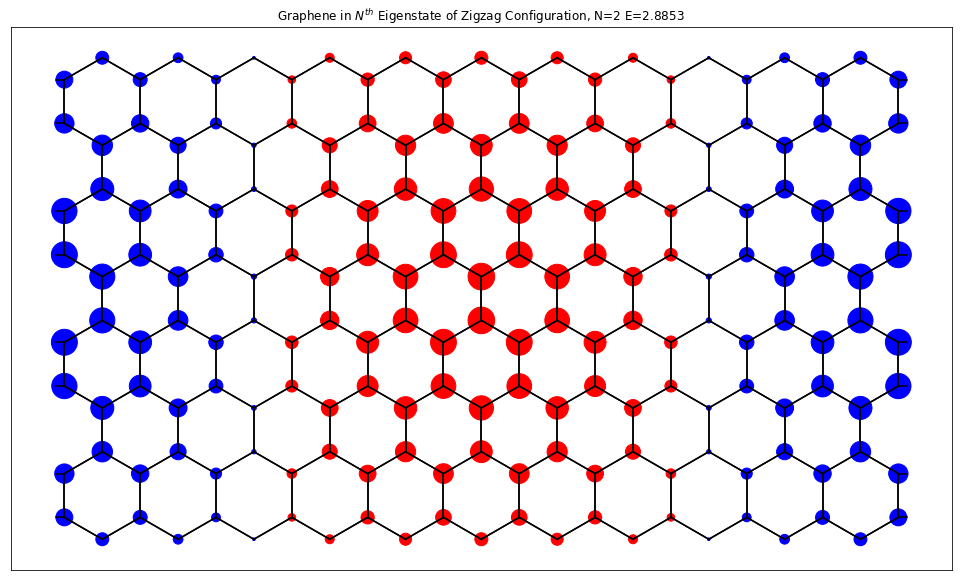

In [557]:
# Visualize graphene eigenstates

level = 2 # select energy level
coords = getCoords(rows,cols)

weights = 5000*np.abs(evecsGraph[:,level-1]) # weighting values for scatter plot
p = 'b' # color for positive values
n = 'r' # color for negative values
colors = getColors(evecsGraph[:,level-1],p,n)

plt.figure(figsize=(20,10))

bondPlot(graph,coords,zig,arm)

if zig < arm: # zigzag configuration
    config = "Zigzag"
    plt.scatter(coords[:,0],coords[:,1],s=weights,c=colors)
else: # armchair configuration
    config = "Armchair"
    plt.scatter(coords[:,1],coords[:,0],s=weights,c=colors)

plt.axes().set_aspect('equal')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.title(r"Graphene in $N^{th}$ Eigenstate of "+config+" Configuration, N="+str(level)+" E="+str(evalsGraph[level-1]))
plt.savefig("figures/"+name+"N="+str(level)+".png")
plt.show()